<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%ED%83%88%ED%87%B4_%ED%9A%8C%EC%9B%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving user_log_model2.csv to user_log_model2.csv


In [3]:
df = pd.read_csv('user_log_model2.csv')
df.head()

,_id,createdTs,creatorClass,creatorIdx,daykey,eventType,origianlData,updatedData,updatedTs,userClass,userIdx
0,60f621b8fa1e1d5338eaa79c,1626743224105,patient,60f5f9edfa1e1d5338ea9d77,20210720,delete,"{objectId=null, createdTs=1.626733037979E12, u...",NaN,1626743224105,patient,60f5f9edfa1e1d5338ea9d77
1,60f76a84854d9d6d4fbcb6a2,1626827396688,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76944854d9d6d4fbcb64b, createdTs=...",NaN,1626827396688,patient,60f76944854d9d6d4fbcb64b
2,60f76b25854d9d6d4fbcb6f2,1626827557032,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76944854d9d6d4fbcb64b, createdTs=...",NaN,1626827557032,patient,60f76944854d9d6d4fbcb64b
3,60f76e06854d9d6d4fbcb777,1626828294032,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76b03854d9d6d4fbcb6da, createdTs=...",NaN,1626828294032,patient,60f76b03854d9d6d4fbcb6da
4,60f7a889854d9d6d4fbcccd2,1626843273018,patient,60f7a489854d9d6d4fbccc62,20210721,delete,"{objectId=null, createdTs=1.626842249065E12, u...",NaN,1626843273018,patient,60f7a489854d9d6d4fbccc62


In [4]:
import pandas as pd

# 1. CSV 파일 불러오기
df = pd.read_csv('user_log_model2.csv', encoding='utf-8')

# 2. 전체 데이터를 복사 (필터링 제거)
df_patient_deletes = df.copy()

# 3. createdTs, updatedTs를 사람이 읽을 수 있는 날짜/시간으로 덮어쓰기
df_patient_deletes['createdTs'] = pd.to_datetime(df_patient_deletes['createdTs'], unit='ms')
df_patient_deletes['updatedTs'] = pd.to_datetime(df_patient_deletes['updatedTs'], unit='ms')

# 4. 사람이 읽을 수 있는 yyyy-mm-dd 형식 문자열도 원한다면 (선택)
df_patient_deletes['createdTs_string'] = df_patient_deletes['createdTs'].dt.strftime('%Y-%m-%d')

# 5. 확인
df_patient_deletes.head()


,_id,createdTs,creatorClass,creatorIdx,daykey,eventType,origianlData,updatedData,updatedTs,userClass,userIdx,createdTs_string
0,60f621b8fa1e1d5338eaa79c,2021-07-20 01:07:04.105,patient,60f5f9edfa1e1d5338ea9d77,20210720,delete,"{objectId=null, createdTs=1.626733037979E12, u...",NaN,2021-07-20 01:07:04.105,patient,60f5f9edfa1e1d5338ea9d77,2021-07-20
1,60f76a84854d9d6d4fbcb6a2,2021-07-21 00:29:56.688,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76944854d9d6d4fbcb64b, createdTs=...",NaN,2021-07-21 00:29:56.688,patient,60f76944854d9d6d4fbcb64b,2021-07-21
2,60f76b25854d9d6d4fbcb6f2,2021-07-21 00:32:37.032,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76944854d9d6d4fbcb64b, createdTs=...",NaN,2021-07-21 00:32:37.032,patient,60f76944854d9d6d4fbcb64b,2021-07-21
3,60f76e06854d9d6d4fbcb777,2021-07-21 00:44:54.032,admin,5f680ce8a4bcc7ea84ff8152,20210721,delete,"{objectId=60f76b03854d9d6d4fbcb6da, createdTs=...",NaN,2021-07-21 00:44:54.032,patient,60f76b03854d9d6d4fbcb6da,2021-07-21
4,60f7a889854d9d6d4fbcccd2,2021-07-21 04:54:33.018,patient,60f7a489854d9d6d4fbccc62,20210721,delete,"{objectId=null, createdTs=1.626842249065E12, u...",NaN,2021-07-21 04:54:33.018,patient,60f7a489854d9d6d4fbccc62,2021-07-21


In [5]:
# createdTs_string 열 삭제
df_patient_deletes.drop(columns=['createdTs_string'], inplace=True)

In [6]:
# 모든 컬럼 이름 확인
df_patient_deletes.columns

Index(['_id', 'createdTs', 'creatorClass', 'creatorIdx', 'daykey', 'eventType',
       'origianlData', 'updatedData', 'updatedTs', 'userClass', 'userIdx'],
      dtype='object')

In [7]:
print("탈퇴한 환자 회원 행 수:", len(df_patient_deletes))

탈퇴한 환자 회원 행 수: 6453


In [8]:
# userIdx 값이 고유한 행 추출
useridx_counts = df_patient_deletes['userIdx'].value_counts()
unique_useridx = useridx_counts[useridx_counts == 1].index
df_useridx_unique = df_patient_deletes[df_patient_deletes['userIdx'].isin(unique_useridx)]

print("userIdx가 고유한 행 수:", len(df_useridx_unique))

userIdx가 고유한 행 수: 4333


In [9]:
# userIdx가 한 번만 등장하는 값만 추출
unique_useridx = df_patient_deletes['userIdx'].value_counts()
only_once_useridx = unique_useridx[unique_useridx == 1].index

# 해당 userIdx만 포함하는 행 추출
df_patient_deletes_only = df_patient_deletes[df_patient_deletes['userIdx'].isin(only_once_useridx)].copy()

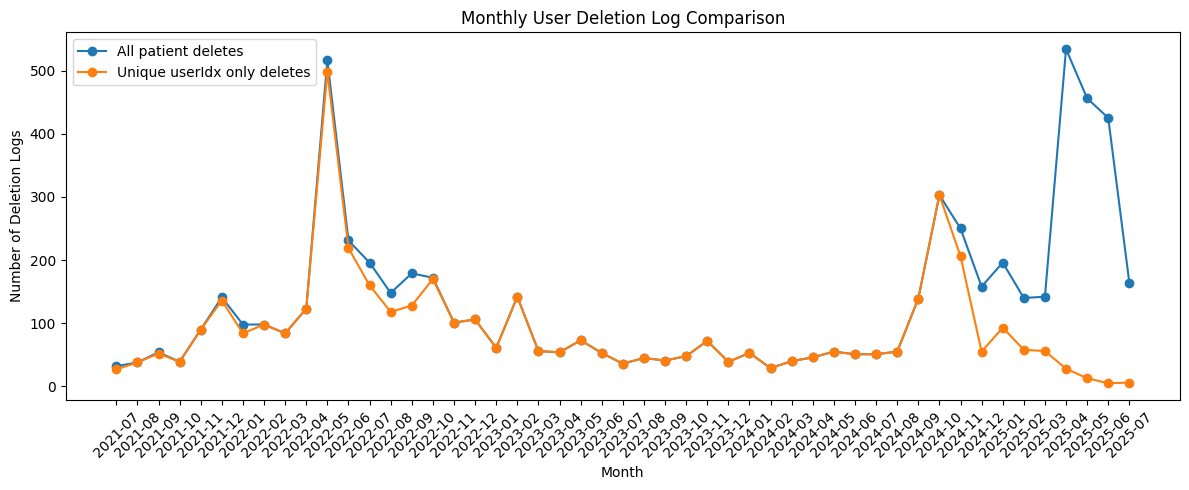

In [10]:
import matplotlib.pyplot as plt

# 월 단위 컬럼 생성
df_patient_deletes['month'] = df_patient_deletes['createdTs'].dt.to_period('M')
df_patient_deletes_only['month'] = df_patient_deletes_only['createdTs'].dt.to_period('M')

# 집계
total_by_month = df_patient_deletes['month'].value_counts().sort_index()
only_once_by_month = df_patient_deletes_only['month'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(total_by_month.index.astype(str), total_by_month.values, label='All patient deletes', marker='o')
plt.plot(only_once_by_month.index.astype(str), only_once_by_month.values, label='Unique userIdx only deletes', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly User Deletion Log Comparison')
plt.xlabel('Month')
plt.ylabel('Number of Deletion Logs')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# 1. 월 단위로 변환
df_patient_deletes['month'] = df_patient_deletes['createdTs'].dt.to_period('M')
df_patient_deletes_only['month'] = df_patient_deletes_only['createdTs'].dt.to_period('M')

# 2. 각 월별 탈퇴 수 집계
total_by_month = df_patient_deletes['month'].value_counts().sort_index()
only_once_by_month = df_patient_deletes_only['month'].value_counts().sort_index()

# 3. 두 데이터를 하나의 DataFrame으로 병합
comparison_df = pd.DataFrame({
    'All patient deletes': total_by_month,
    'Unique userIdx only deletes': only_once_by_month
}).fillna(0).astype(int)

# 4. 확인
comparison_df.head()

,All patient deletes,Unique userIdx only deletes
month,,
2021-07,32,27
2021-08,38,38
2021-09,54,52
2021-10,39,39
2021-11,90,90


In [12]:
# pandas 라이브러리 불러오기
import pandas as pd

# comparison_df를 엑셀 파일로 저장
comparison_df.to_excel('monthly_deletion_log_comparison.xlsx', index_label='Month')

# Google Colab이라면 다운로드 링크 제공
from google.colab import files
files.download('monthly_deletion_log_comparison.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>